In [2]:
import os
import cv2
import random

import numpy as np
import pandas as pd

import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import load_model
from tensorflow.keras import layers,applications
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
# to not get tensed over unnecessary warning we will ignore them
import warnings
warnings.filterwarnings('ignore')

In [3]:
# specifying the image size we want to input in model
picture_size=48

In [4]:
# specifying the path where the data is stored
folder_path = ('../input/fer2013')

In [5]:
# lsit of all classes
classes = ['angry','disgust','fear','happy','neutral','sad','surprise']

angry
disgust
fear
happy
neutral
sad
surprise


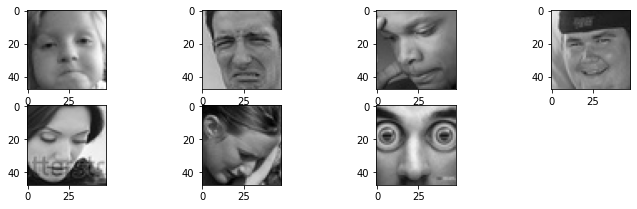

(48, 48, 3)


In [6]:
# viewing some of the images from each category
plt.figure(figsize= (12,12))
i=1
for category in classes:
    for j in range(1,5):
        plt.subplot(7,4,i)
        img = load_img("../input/fer2013/train/"+category+"/"+
                  os.listdir("../input/fer2013/train/" + category)[j], target_size=(picture_size, picture_size))
    plt.imshow(img)
    i+=1
    print(category) 
plt.show()
x=img_to_array(img)
print(x.shape)

In [8]:
# finding the count of images in each category
category=[]
examples=[]
for i in classes:
    dir='../input/fer2013/train/'+i
    onlyfiles = next(os.walk(dir))[2] #dir is your directory path as string
    category.append(i)
    examples.append(len(onlyfiles))

In [9]:
# creating a dataframe for the count of images
example_count_df=pd.DataFrame(category,columns=['Category'],index=[1,2,3,4,5,6,7])
example_count_df['No. of images']=examples
example_count_df

,Category,No. of images
1,angry,3995
2,disgust,436
3,fear,4097
4,happy,7215
5,neutral,4965
6,sad,4830
7,surprise,3171


Text(0.5, 1.0, 'Count of images in each category')

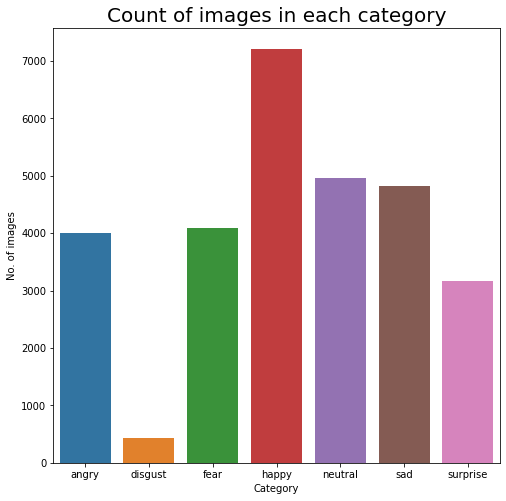

In [10]:
# visualizing
plt.figure(figsize=(8,8))
sns.barplot(x=example_count_df['Category'],y=example_count_df['No. of images'])
plt.title('Count of images in each category',fontsize=20)

In [11]:
# defining the train and test set 
batch_size  = 128

datagen_train  = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)
datagen_val = ImageDataGenerator(rescale=1./255)

train_set = datagen_train.flow_from_directory("../input/fer2013/train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory("../input/fer2013/test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [12]:
# defining a CNN model
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2021-12-24 16:08:38.864683: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-24 16:08:38.950425: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-24 16:08:38.951114: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-24 16:08:38.952238: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [14]:
# defining a callback that will save the best model
checkpoint = ModelCheckpoint("model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint]

# defining no. of epoch
epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [15]:
# Fitting and training the model
history = model.fit(train_set,
                        epochs=epochs,
                        validation_data = test_set,
                        callbacks=callbacks_list
                        )

2021-12-24 16:09:10.176949: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/48


2021-12-24 16:09:12.698923: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


225/225 [==============================] - 153s 646ms/step - loss: 1.8455 - accuracy: 0.2845 - val_loss: 2.2942 - val_accuracy: 0.2810

Epoch 00001: val_accuracy improved from -inf to 0.28100, saving model to model.h5
Epoch 2/48
225/225 [==============================] - 33s 147ms/step - loss: 1.5474 - accuracy: 0.4063 - val_loss: 1.7073 - val_accuracy: 0.3245

Epoch 00002: val_accuracy improved from 0.28100 to 0.32446, saving model to model.h5
Epoch 3/48
225/225 [==============================] - 33s 147ms/step - loss: 1.3855 - accuracy: 0.4673 - val_loss: 1.3669 - val_accuracy: 0.4861

Epoch 00003: val_accuracy improved from 0.32446 to 0.48607, saving model to model.h5
Epoch 4/48
225/225 [==============================] - 33s 146ms/step - loss: 1.3007 - accuracy: 0.5012 - val_loss: 1.3292 - val_accuracy: 0.4960

Epoch 00004: val_accuracy improved from 0.48607 to 0.49596, saving model to model.h5
Epoch 5/48
225/225 [==============================] - 33s 146ms/step - loss: 1.2441 - acc

In [17]:
# loading the saved model
trained_model=load_model('model.h5')

In [18]:
# evaluating the train set
trained_model.evaluate(train_set)

225/225 [==============================] - 28s 122ms/step - loss: 0.6348 - accuracy: 0.7644


[0.6348219513893127, 0.7644292712211609]

In [19]:
# evaluating the test set
trained_model.evaluate(test_set)

57/57 [==============================] - 4s 75ms/step - loss: 1.0239 - accuracy: 0.6471


[1.0239152908325195, 0.6471161842346191]

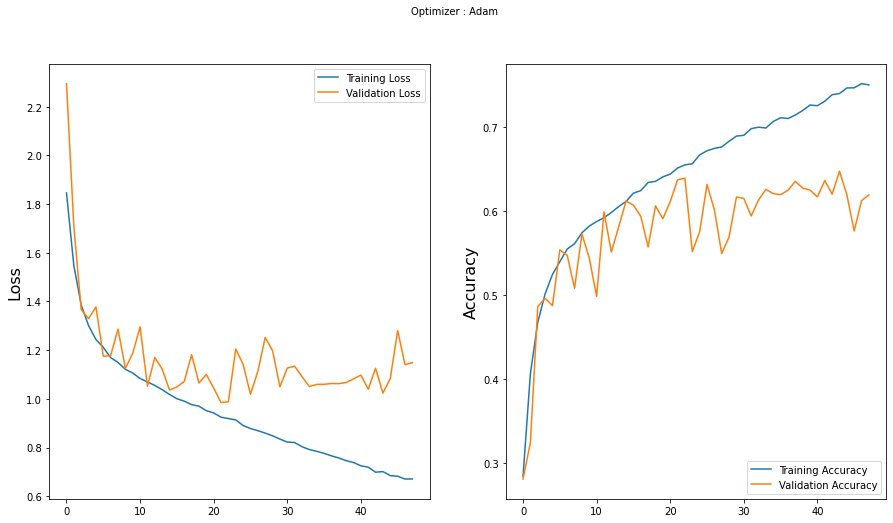

In [20]:
# plotting the Loss for training and validation set
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

# plotting the Accuracy for training and validation set
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [21]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [22]:
test_examples = ['../input/test-image/Fear.jpg',
                 '../input/test-image/angry.jpg',
                '../input/test-image/disgust.jpg',
                '../input/test-image/happy.jpg',
                '../input/test-image/neutral.jpg',
                '../input/test-image/sad.jpg',
                '../input/test-image/surprise.jpg']

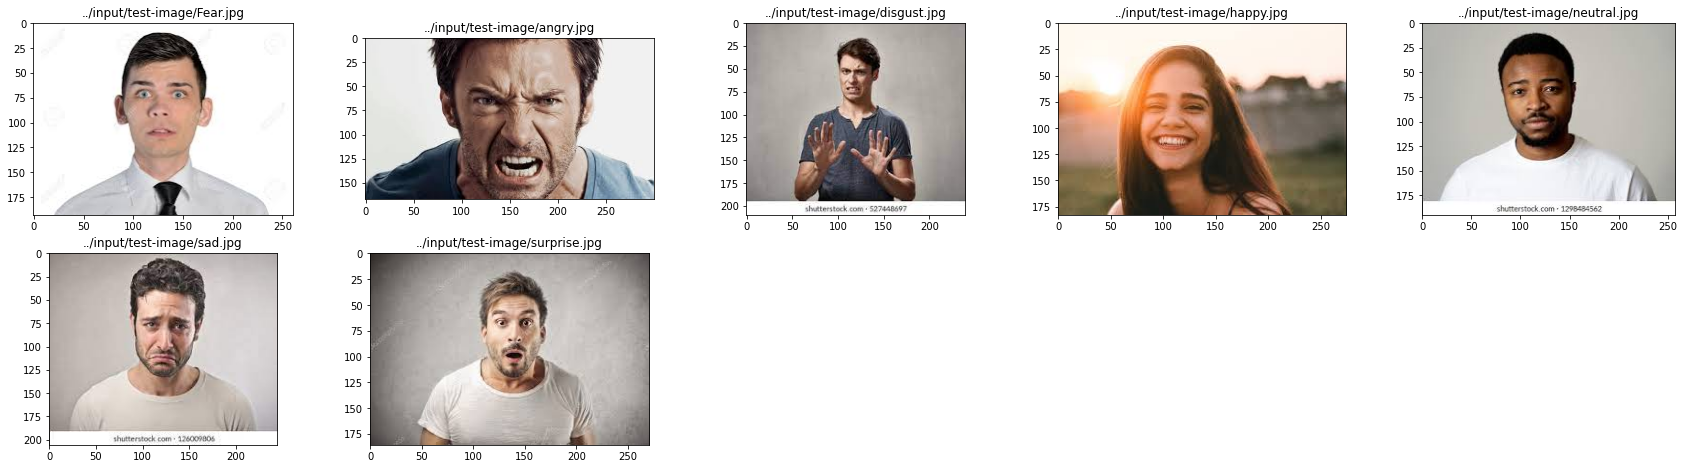

In [23]:
# view these images
plt.figure(figsize=(30,12))
for i,j in enumerate(test_examples):
    frame=cv2.imread(j)
    plt.subplot(3,5,i+1)
    plt.title(j)
    plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [25]:
# defining emotion labels
emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

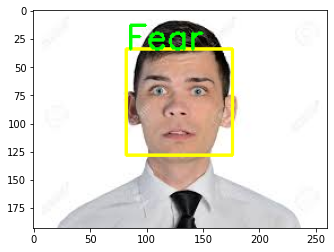

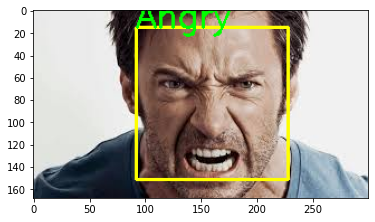

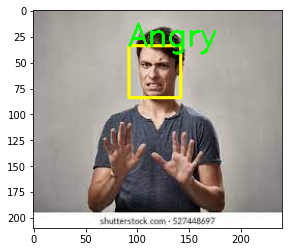

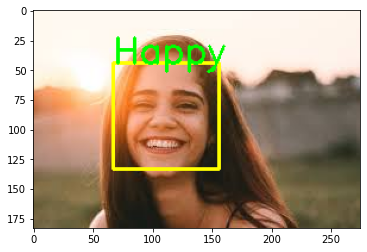

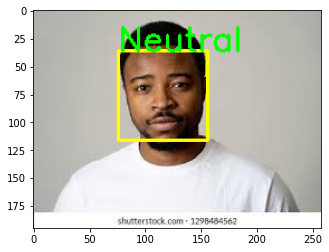

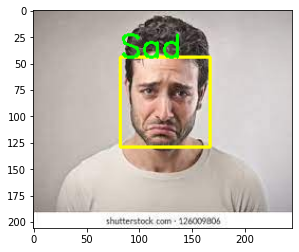

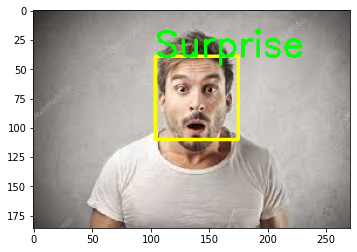

In [26]:
# making predictions
for i in test_examples:
    frame=cv2.imread(i)
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)

        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

            prediction = trained_model.predict(roi)[0]
            label=emotion_labels[prediction.argmax()]
            label_position = (x,y)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        else:
            cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.show()
    #cv2.imshow(frame)